In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Improving the Model

Today, we want to improve our basic linear models with both the Advertising example.  We start by looking a second look at the Ames housing data.  

In [3]:
ames = pd.read_csv('data/ames_housing.csv')

In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

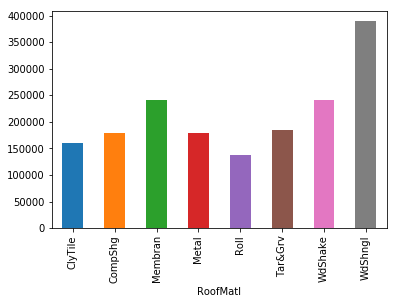

In [5]:
ames.groupby('RoofMatl')['SalePrice'].mean().plot(kind = 'bar')

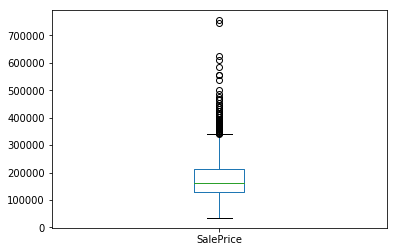

In [6]:
ames['SalePrice'].plot(kind = 'box')

In [7]:
ames['SalePrice'].sort_values()[:10]

495     34900
916     35311
968     37900
533     39300
30      40000
710     52000
1337    52500
705     55000
1325    55000
812     55993
Name: SalePrice, dtype: int64

In [8]:
ames['SalePrice'].sort_values(ascending = False)[:15]

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
1243    465000
591     451950
527     446261
Name: SalePrice, dtype: int64

In [9]:
ames.shape

(1460, 81)

In [10]:
ames['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

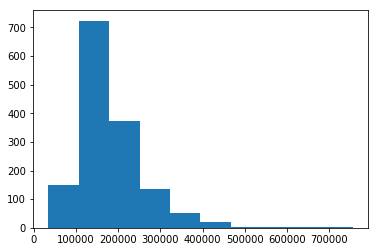

In [11]:
plt.hist(ames['SalePrice'])

In [12]:
ames_trimmed = ames[ames['SalePrice'] < 450000]

In [13]:
ames_trimmed['SalePrice'].describe()

count      1446.000000
mean     177268.663900
std       69949.609762
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212000.000000
max      446261.000000
Name: SalePrice, dtype: float64

(array([  5.,   5.,  14.,  79., 196., 419., 352., 218., 115.,  43.]),
 array([10.46024211, 10.71508382, 10.96992554, 11.22476725, 11.47960897,
        11.73445068, 11.9892924 , 12.24413412, 12.49897583, 12.75381755,
        13.00865926]),
 <a list of 10 Patch objects>)

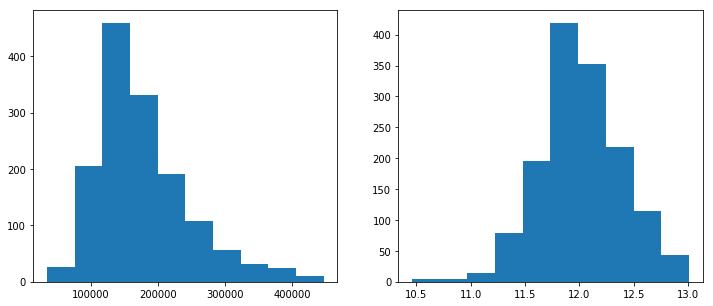

In [19]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.hist(ames_trimmed['SalePrice'])

plt.subplot(1, 2, 2)
plt.hist(np.log(ames_trimmed['SalePrice']))

In [48]:
print(ames['SalePrice'].skew(), ames_trimmed['SalePrice'].skew())

1.8828757597682129 1.110037954187014


In [49]:
print(np.log(ames['SalePrice']).skew(), np.log(ames_trimmed['SalePrice'].skew()))

0.12133506220520406 0.10439420770095068


In [51]:
ames_trimmed['logPrice'] = ames_trimmed['SalePrice'].apply(np.log)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
ames_trimmed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog,logPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216,12.429216


Text(0,1,'Sales Price vs. GrLivArea')

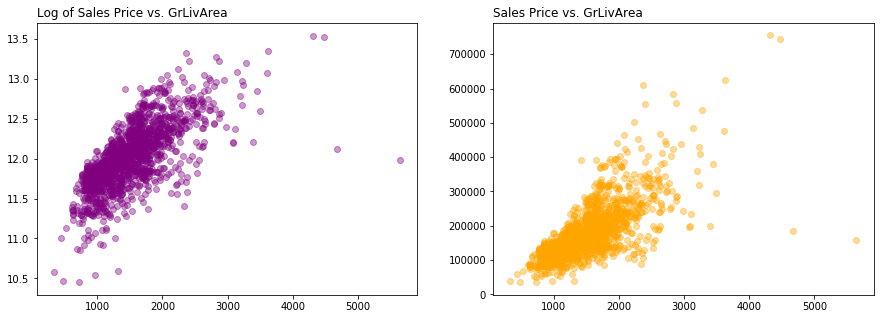

In [53]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.scatter(ames.GrLivArea, ames.logPrice, color = 'purple', alpha = 0.4)
plt.title("Log of Sales Price vs. GrLivArea", loc = 'left')

plt.subplot(1, 2, 2)
plt.scatter(ames.GrLivArea, ames.SalePrice, color = 'orange', alpha = 0.4)
plt.title("Sales Price vs. GrLivArea", loc = 'left')

In [54]:
ames_trimmed.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Looking at `int64`

To begin, let's try to find some variables that we can use to build our model.

In [55]:
int_cols = ames_trimmed.select_dtypes(include = ['int64'])

In [56]:
corr_mat = int_cols.corr()

In [57]:
corr_mat.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.012144,-0.034896,-0.034706,0.016957,-0.017687,-0.023689,-0.009913,-0.003882,-0.010673,...,-0.036361,-0.001801,0.003585,-0.046591,0.009408,0.050560,-0.006099,0.021436,0.004077,-0.037649
MSSubClass,0.012144,1.000000,-0.141151,0.039744,-0.061964,0.031995,0.043593,-0.063468,-0.064634,-0.142641,...,-0.012810,-0.004439,-0.012894,-0.044158,-0.028155,0.007998,-0.007898,-0.014725,-0.020312,-0.085239
LotArea,-0.034896,-0.141151,1.000000,0.089340,-0.004818,0.008506,0.006835,0.205854,0.114193,-0.004085,...,0.160039,0.080700,-0.015264,0.021695,0.027306,0.079446,0.039260,0.003257,-0.015853,0.253024
OverallQual,-0.034706,0.039744,0.089340,1.000000,-0.091582,0.576217,0.548880,0.212155,-0.060839,0.304397,...,0.229469,0.292409,-0.108790,0.034195,0.045042,0.044094,-0.030249,0.082848,-0.026061,0.797417
OverallCond,0.016957,-0.061964,-0.004818,-0.091582,1.000000,-0.370417,0.077660,-0.038373,0.041197,-0.139105,...,0.001151,-0.035555,0.070026,0.025396,0.043869,0.003012,0.068917,-0.003948,0.048363,-0.077694


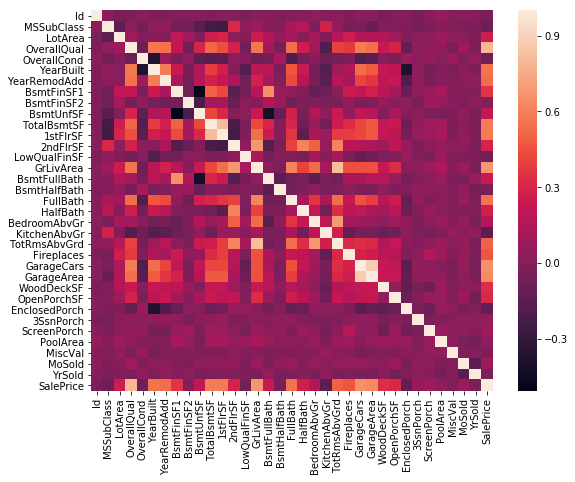

In [58]:
plt.figure(figsize = (9, 7))
sns.heatmap(corr_mat)

In [62]:
corr_mat[corr_mat['SalePrice'] >= .5]['SalePrice']

OverallQual     0.797417
YearBuilt       0.556850
YearRemodAdd    0.535147
TotalBsmtSF     0.591577
1stFlrSF        0.581538
GrLivArea       0.679962
FullBath        0.553937
TotRmsAbvGrd    0.502258
GarageCars      0.652880
GarageArea      0.631034
SalePrice       1.000000
Name: SalePrice, dtype: float64

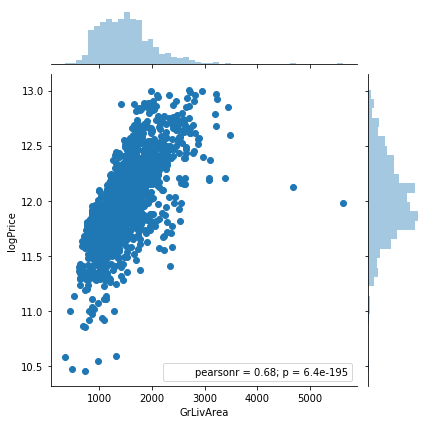

In [63]:
sns.jointplot('GrLivArea', 'logPrice', data = ames_trimmed)

In [64]:
import statsmodels.formula.api as smf

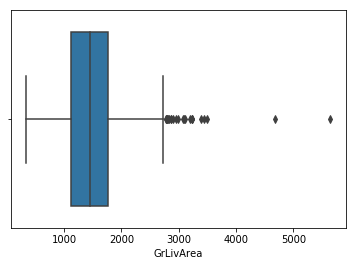

In [65]:
sns.boxplot('GrLivArea', data = ames_trimmed)

In [66]:
ames_trimmed['GrLivArea'].describe()

count    1446.000000
mean     1500.993084
std       501.654786
min       334.000000
25%      1126.500000
50%      1456.000000
75%      1768.000000
max      5642.000000
Name: GrLivArea, dtype: float64

In [67]:
ames_trimmed['GrLivArea'].nlargest(10)

1298    5642
523     4676
304     3493
1268    3447
635     3395
1353    3238
496     3228
118     3222
608     3194
197     3112
Name: GrLivArea, dtype: int64

In [68]:
ames_trimmed = ames_trimmed[ames_trimmed['GrLivArea'] <= 3300]

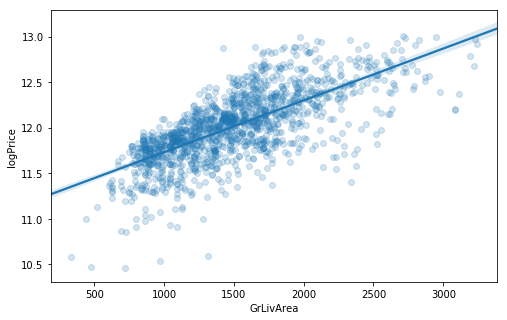

In [77]:
plt.figure(figsize = (8, 5))
sns.regplot('GrLivArea', 'logPrice', data = ames_trimmed, scatter_kws = {'alpha': 0.2})

In [80]:
lm = smf.ols(formula = 'logPrice ~ GrLivArea', data = ames_trimmed).fit()

In [81]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1427.
Date:                Fri, 30 Mar 2018   Prob (F-statistic):          1.64e-217
Time:                        20:31:36   Log-Likelihood:                -164.64
No. Observations:                1441   AIC:                             333.3
Df Residuals:                    1439   BIC:                             343.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1628      0.024    473.489      0.000      11.117      11.209
GrLivArea      0.0006   1.51e-05     37.772      0.000       0.001       0.001
==============================================================================
Omnibus:                      116.031   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.131
Skew:                          -0.587   Prob(JB):                     3.14e-42
Kurtosis:                       4.343   Cond. No.                     5.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

In [82]:
lm2 = smf.ols(formula = 'SalePrice ~ GrLivArea + TotalBsmtSF', data = ames_trimmed).fit()

In [83]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1394.
Date:                Fri, 30 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:32:03   Log-Likelihood:                -17339.
No. Observations:                1441   AIC:                         3.468e+04
Df Residuals:                    1438   BIC:                         3.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.061e+04   3899.669     -5.285      0.000   -2.83e+04    -1.3e+04
GrLivArea      80.5648      2.439     33.039      0.000      75.781      85.348
TotalBsmtSF    74.3222      2.885     25.764      0.000      68.663      79.981
==============================================================================
Omnibus:                       65.663   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.979
Skew:                          -0.040   Prob(JB):                     9.32e-47
Kurtosis:                       4.877   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

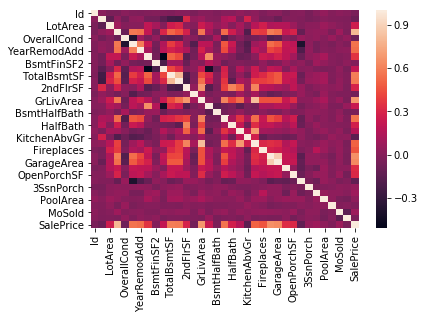

In [33]:
sns.heatmap(corr_mat)

In [84]:
lm_mult = smf.ols(formula = 'logPrice ~ GrLivArea + TotalBsmtSF + LotArea + GarageArea', data = ames_trimmed).fit()

In [85]:
lm_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     890.2
Date:                Fri, 30 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:32:32   Log-Likelihood:                 237.44
No. Observations:                1441   AIC:                            -464.9
Df Residuals:                    1436   BIC:                            -438.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.8911      0.020    548.952      0.000      10.852      10.930
GrLivArea       0.0004   1.31e-05     27.614      0.000       0.000       0.000
TotalBsmtSF     0.0003   1.57e-05     18.902      0.000       0.000       0.000
LotArea      1.447e-06   5.72e-07      2.530      0.012    3.25e-07    2.57e-06
GarageArea      0.0005   3.09e-05     17.556      0.000       0.000       0.001
==============================================================================
Omnibus:                      331.217   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.159
Skew:                          -1.196   Prob(JB):                    3.74e-193
Kurtosis:                       6.006   Cond. No.                     5.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
co = lm_mult.params

In [92]:
co

Intercept      10.891113
GrLivArea       0.000363
TotalBsmtSF     0.000297
LotArea         0.000001
GarageArea      0.000543
dtype: float64

In [93]:
def sp(w, x, y, z): return co[0] + co[1]*w + co[2]*x + co[3]*y + co[4]*z

In [94]:
sp(1000, 400, 44000, 100)

11.490676597718512

In [95]:
import statsmodels as sm

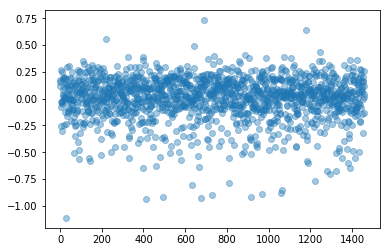

In [96]:
plt.plot(lm_mult.resid, 'o', alpha = 0.4)

In [97]:
ames_trimmed.shape

(1441, 83)

In [98]:
train = ames_trimmed[:1200]
test = ames_trimmed[1200:]

In [99]:
model = smf.ols('logPrice ~ GrLivArea + TotalBsmtSF + LotArea + GarageArea', data = ames_trimmed).fit()

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     890.2
Date:                Fri, 30 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:34:09   Log-Likelihood:                 237.44
No. Observations:                1441   AIC:                            -464.9
Df Residuals:                    1436   BIC:                            -438.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.8911      0.020    548.952      0.000      10.852      10.930
GrLivArea       0.0004   1.31e-05     27.614      0.000       0.000       0.000
TotalBsmtSF     0.0003   1.57e-05     18.902      0.000       0.000       0.000
LotArea      1.447e-06   5.72e-07      2.530      0.012    3.25e-07    2.57e-06
GarageArea      0.0005   3.09e-05     17.556      0.000       0.000       0.001
==============================================================================
Omnibus:                      331.217   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.159
Skew:                          -1.196   Prob(JB):                    3.74e-193
Kurtosis:                       6.006   Cond. No.                     5.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
predictions = model.predict(test)

In [102]:
predictions[:5]

1215    11.700024
1216    11.886662
1217    12.066563
1218    11.230885
1219    11.535054
dtype: float64

In [103]:
test['SalePrice'].head()

1215    125000
1216    112000
1217    229456
1218     80500
1219     91500
Name: SalePrice, dtype: int64

In [104]:
difference = np.sqrt((predictions - test['SalePrice'])**2)

In [105]:
difference.mean()

176017.19878728528

Text(0,0.5,'Sales')

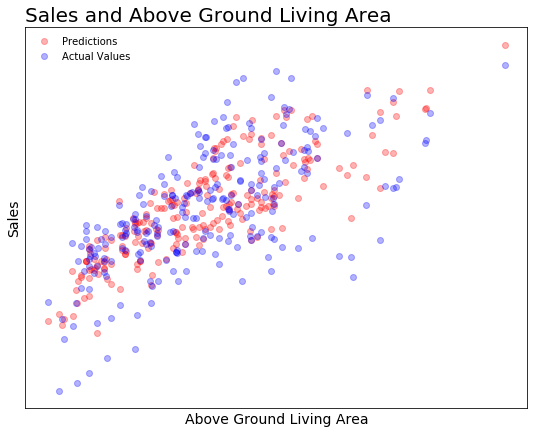

In [107]:
plt.figure(figsize = (9, 7))
plt.plot(test['GrLivArea'], predictions, 'o', color = 'red', alpha = 0.3, label = 'Predictions')
plt.plot(test['GrLivArea'], test['logPrice'], 'o', color = 'blue', alpha = 0.3, label = 'Actual Values')
plt.legend(frameon = False)
plt.title('Sales and Above Ground Living Area', loc = 'left', fontsize = 20)
plt.xticks([])
plt.yticks([])

plt.xlabel('Above Ground Living Area', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)

In [108]:
ames_trimmed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog,logPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216,12.429216


In [109]:
col = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'GarageArea']

(array([ 81., 167., 293., 500., 240., 106.,  57.,  10.,   3.,   3.]),
 array([   0. ,  141.8,  283.6,  425.4,  567.2,  709. ,  850.8,  992.6,
        1134.4, 1276.2, 1418. ]),
 <a list of 10 Patch objects>)

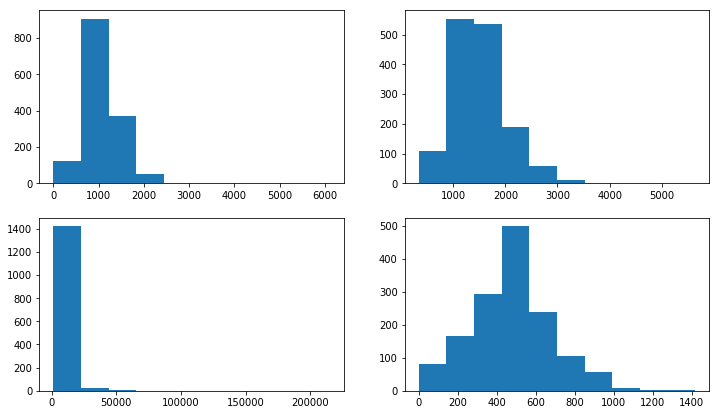

In [110]:
plt.figure(figsize = (12, 7))
plt.subplot(2, 2, 1)
plt.hist(ames['TotalBsmtSF'])

plt.subplot(2, 2, 2)
plt.hist(ames['GrLivArea'])

plt.subplot(2, 2, 3)
plt.hist(ames['LotArea'])

plt.subplot(2, 2, 4)
plt.hist(ames['GarageArea'])

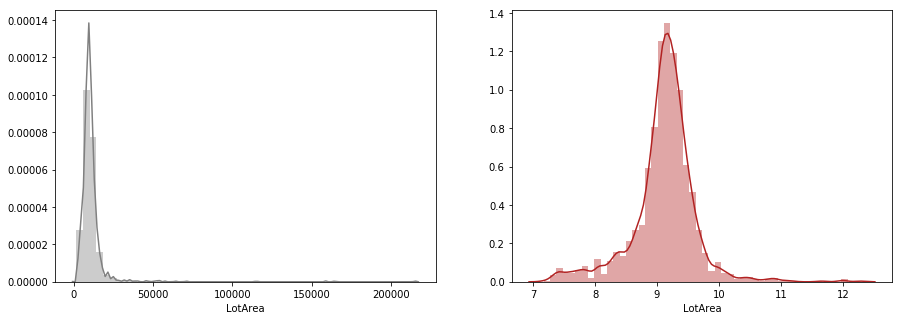

In [115]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
sns.distplot(ames['LotArea'], color = 'grey')

plt.subplot(122)
sns.distplot(np.log(ames['LotArea']), color = 'firebrick')

### Transformations

Using the benchmark of a skew value greater than 0.5, tranform appropriate columns.  Extra points for efficiency here.

Refine a model using these new variables.

In [132]:
housing = pd.read_csv('data/cali_housing.csv', index_col = 'Unnamed: 0')

In [133]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Handling Missing Values

In [122]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [123]:
ames.PoolQC[:10]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: PoolQC, dtype: object